<a href="https://www.kaggle.com/code/jeff125/spaceship-titanic?scriptVersionId=107330836" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Loading Data

In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
print("Train Data Shape :",train.shape)
print("Test Data Shape :",test.shape)
print("Test Data Shape :",submission.shape)

Train Data Shape : (8693, 14)
Test Data Shape : (4277, 13)
Test Data Shape : (4277, 2)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [10]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [12]:
submission.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,1
top,0013_01,False
freq,1,4277


In [13]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [14]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [15]:
submission.dtypes

PassengerId    object
Transported      bool
dtype: object

In [16]:
print("Train data :\n")
print(train.isnull().sum())

Train data :

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [17]:
print("Test data :\n")
print(test.isnull().sum())

Test data :

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [18]:
print("Test data :\n")
print(submission.isnull().sum())

Test data :

PassengerId    0
Transported    0
dtype: int64


In [19]:
sns.set_theme(style="dark")

<AxesSubplot:ylabel='Transported'>

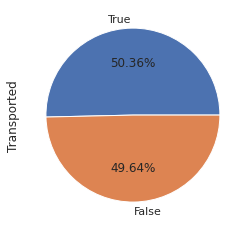

In [20]:
train['Transported'].value_counts().plot.pie(autopct='%1.2f%%')

Text(0.5, 0, 'Age')

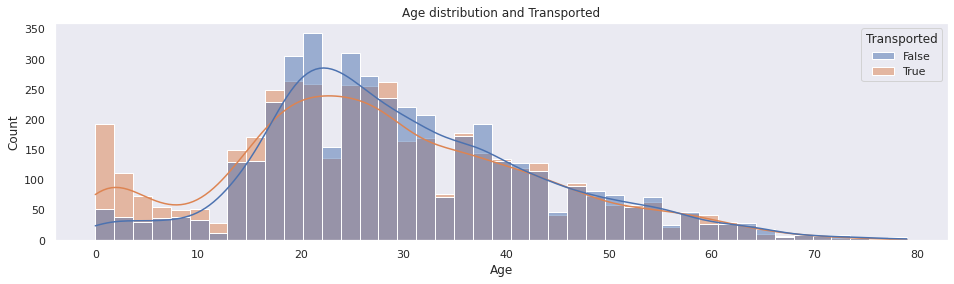

In [21]:
plt.figure(figsize=(16,4))

sns.histplot(train, x=train["Age"], hue="Transported", kde=True)

plt.title("Age distribution and Transported")
plt.xlabel("Age")

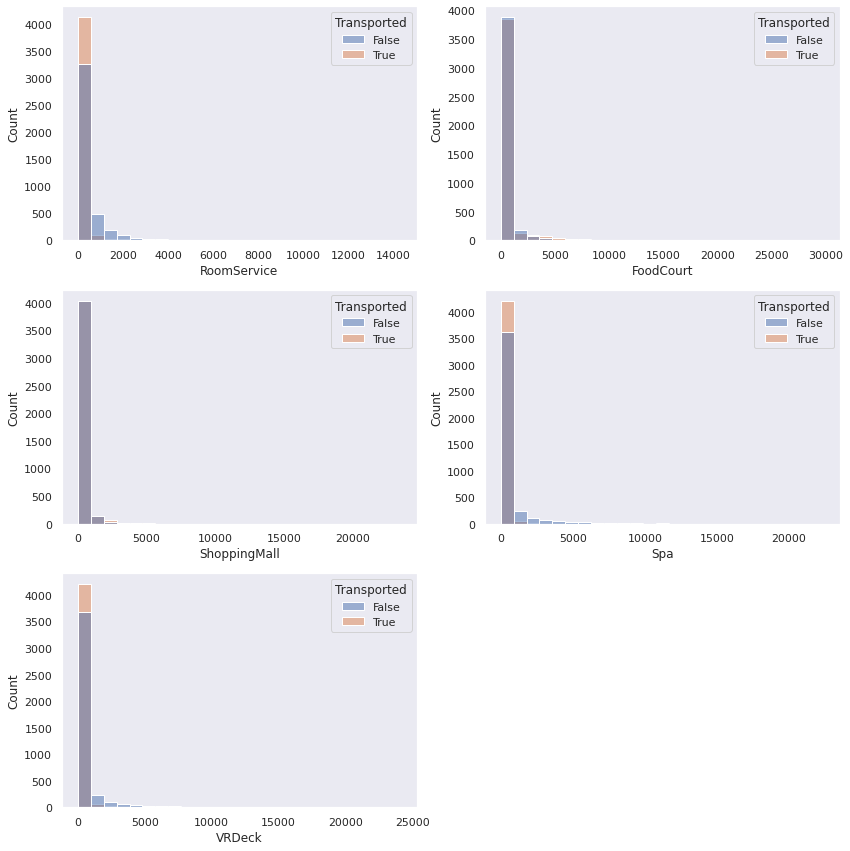

In [22]:
Expenditure=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig=plt.figure(figsize=(12,12))

for i,name in enumerate(Expenditure):
    ax = fig.add_subplot(3,2,i+1)
    sns.histplot(data=train, x=name, axes=ax, bins=25, kde=False, hue='Transported')

plt.tight_layout()  
plt.show()

In [23]:
train[['CabinDeck', 'CabinNum', 'CabinSide']] = train['Cabin'].str.split('/', expand = True)

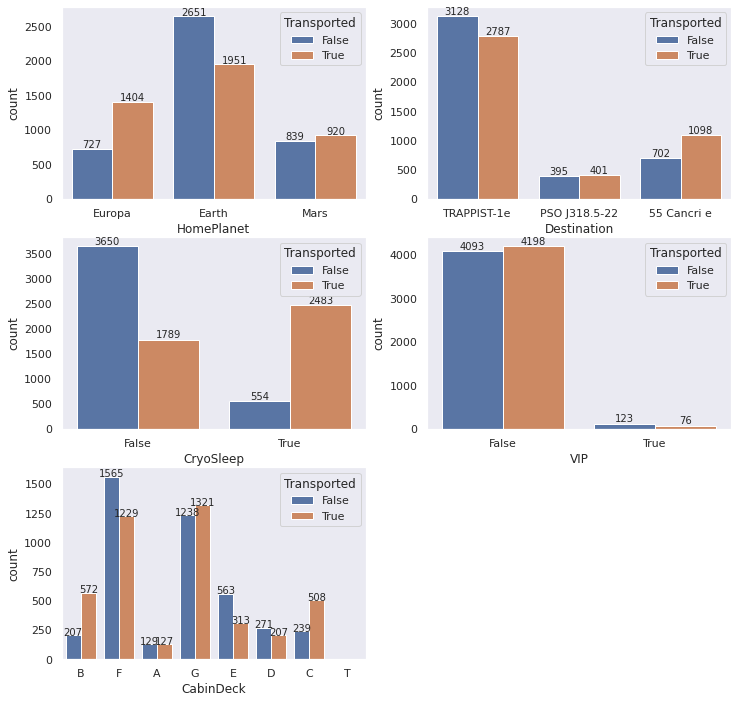

In [24]:
categorical_data=['HomePlanet', 'Destination', 'CryoSleep','VIP','CabinDeck']

fig=plt.figure(figsize=(12,12))

for i,name in enumerate(categorical_data):
    fig.add_subplot(3,2,i+1)
    ax = sns.countplot(data=train, x=name,hue='Transported')
    
    for p in ax.patches:
     ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
           ha='center', va='center', fontsize=10,  xytext=(0, 6), rotation = 0,
           textcoords='offset points') 
plt.show()

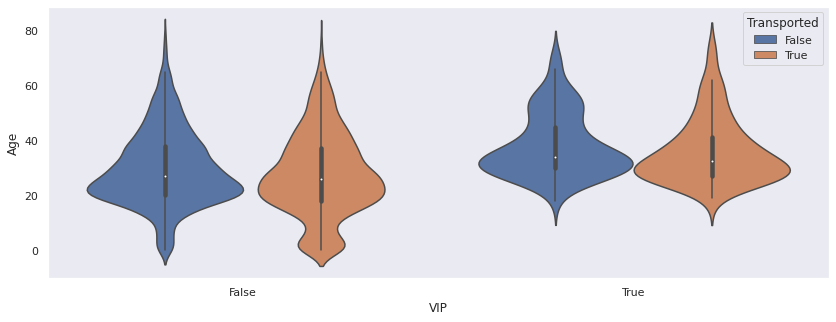

In [25]:
plt.figure(figsize=(14,5))

violin =  sns.violinplot(data = train , x = "VIP" , y = "Age", kde=False, hue='Transported')

plt.show(violin)

In [26]:
train.dropna(inplace = True)
test.dropna(inplace = True)

In [27]:
train.drop(['PassengerId','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Cabin','CabinDeck','CabinNum','CabinSide'], axis=1, inplace=True)
test.drop(['VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','Cabin'], axis=1, inplace=True)

In [28]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,False
1,Earth,False,TRAPPIST-1e,24.0,True
2,Europa,False,TRAPPIST-1e,58.0,False
3,Europa,False,TRAPPIST-1e,33.0,False
4,Earth,False,TRAPPIST-1e,16.0,True


In [29]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age
0,0013_01,Earth,True,TRAPPIST-1e,27.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0
2,0019_01,Europa,True,55 Cancri e,31.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0


In [30]:
train = pd.get_dummies(train, columns=['CryoSleep','Destination','HomePlanet'], drop_first=True)
test = pd.get_dummies(test, columns=['CryoSleep','Destination','HomePlanet'], drop_first=True)

In [31]:
train.head()

,Age,Transported,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars
0,39.0,False,0,0,1,1,0
1,24.0,True,0,0,1,0,0
2,58.0,False,0,0,1,1,0
3,33.0,False,0,0,1,1,0
4,16.0,True,0,0,1,0,0


In [32]:
test.head()

,PassengerId,Age,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,27.0,1,0,1,0,0
1,0018_01,19.0,0,0,1,0,0
2,0019_01,31.0,1,0,0,1,0
3,0021_01,38.0,0,0,1,1,0
4,0023_01,20.0,0,0,1,0,0


In [33]:
x = train.drop('Transported', axis=1)
x

,Age,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars
0,39.0,0,0,1,1,0
1,24.0,0,0,1,0,0
2,58.0,0,0,1,1,0
3,33.0,0,0,1,1,0
4,16.0,0,0,1,0,0
...,...,...,...,...,...,...
8688,41.0,0,0,0,1,0
8689,18.0,1,1,0,0,0
8690,26.0,0,0,1,0,0
8691,32.0,0,0,0,1,0


In [34]:
test1 = test.copy()
test1.head()

,PassengerId,Age,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Europa,HomePlanet_Mars
0,0013_01,27.0,1,0,1,0,0
1,0018_01,19.0,0,0,1,0,0
2,0019_01,31.0,1,0,0,1,0
3,0021_01,38.0,0,0,1,1,0
4,0023_01,20.0,0,0,1,0,0


In [35]:
test.drop('PassengerId',axis = 1, inplace=True)

In [36]:
sc = StandardScaler()

x = sc.fit_transform(x)
test = sc.transform(test)

In [37]:
x = x
y = train['Transported']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# Model

**Logistic Regression**

In [39]:
model = LogisticRegression()
model.fit(x_train, y_train)

print(model.score(x_train, y_train))

0.7146101438304315


**Classification Report**

In [40]:
predicted = model.predict(x_test)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.67      0.81      0.74       648
        True       0.78      0.62      0.69       674

    accuracy                           0.71      1322
   macro avg       0.72      0.72      0.71      1322
weighted avg       0.72      0.71      0.71      1322



**Model Score**

In [41]:
print(f"The model's accuracy score is {round(accuracy_score(y_test, predicted)*100, 2)}%")

The model's accuracy score is 71.41%
